In [26]:
import numpy as np
import os, pandas

In [27]:
self_report_dir = '/Users/biota/Desktop/sSL/experiment_2/collection/self_report_data/'
files = os.listdir(self_report_dir)
subject_files = [_id_ for _id_ in files if 'x' not in _id_][35:]
# 5 was no show on d2, Virsaviya didn't save the data from 18's day 1 
#subject_files.remove('s15_d1.npy'); subject_files.remove('s18_d2.npy'); subject_files.remove('s18_d1.npy')

In [28]:
# quick way to just catch subjects with two data points 

day_sum = [] 
for subject in subject_files: 
    
    day_sum.append(sum([subject[1:3] == subject_files[i_subject][1:3] for i_subject in range(len(subject_files))]))

include_subjects = np.array(day_sum) == 2
subject_files = np.array(subject_files)[include_subjects]


In [29]:
data = {} ; 
day_keys = {}

remove_exp_data =  ['frame_intervals', 'isi', 'CS', 'time', 'error_msg','day', 'experimenter_id']
remove_day_data = ['subject_id', 'counter_balance']

for i_file in range(len(subject_files)):  
    
    subject = np.load(self_report_dir+subject_files[i_file]).item()
        
    if 'd1' in subject_files[i_file]: 
        day = 1 
        day_keys['1'] = subject.keys()
        [subject.pop(remove, None) for remove in remove_day_data]
    else: 
        day = 2        
        day_keys['2'] = subject.keys()
    
    [subject.pop(remove, None) for remove in remove_exp_data]
    
    for key in subject.keys(): 
        
        try: 
            data[key].append(subject[key])
        except: 
            data[key] = [subject[key]]
            
        if key == 'subject_id': 
            data["subject_id"][-1] = data["subject_id"][-1][1:3]

In [30]:
b_data = pandas.DataFrame.from_dict(data) ; b_data

,believe_ayer,color,counter_balance,familiar,feel_ayer,feel_blue,feel_red,pain_other,pain_self,pain_self_obs,prob_blue,prob_red,relate,subject_id,voltage,which_color
0,100.0,red,1,60.0,100.0,0.0,70.0,58.0,10.0,6.0,0.0,50.0,80.0,19,10.00,0.0
1,80.0,red,0,0.0,80.0,20.0,90.0,50.0,3.0,20.0,0.0,70.0,20.0,20,3.00,0.0
2,100.0,red,1,0.0,75.0,0.0,60.0,60.0,50.0,25.0,0.0,75.0,80.0,21,3.50,0.0
3,80.0,red,0,0.0,70.0,0.0,20.0,60.0,50.0,25.0,0.0,50.0,50.0,22,2.00,0.0
4,90.0,red,1,30.0,90.0,0.0,40.0,45.0,40.0,10.0,0.0,60.0,70.0,23,10.00,0.0
5,15.0,red,0,0.0,3.0,0.0,10.0,50.0,45.0,0.0,0.0,50.0,2.0,24,4.00,0.0
6,40.0,red,1,0.0,70.0,20.0,50.0,70.0,50.0,20.0,10.0,80.0,5.0,25,2.40,0.0
7,100.0,red,0,0.0,100.0,0.0,5.0,40.0,3.0,10.0,10.0,75.0,50.0,26,0.00,0.0
8,60.0,red,1,30.0,40.0,0.0,80.0,65.0,50.0,10.0,0.0,30.0,50.0,27,4.50,0.0
9,60.0,red,0,40.0,60.0,3.0,6.0,90.0,60.0,60.0,0.0,80.0,60.0,28,2.50,0.0


In [31]:
scale_voltage = np.nonzero(b_data['voltage'].values  > 10)[0]

In [32]:
b_data.set_value(14, 'voltage', 3)
b_data.set_value(27, 'voltage', 1.1); 

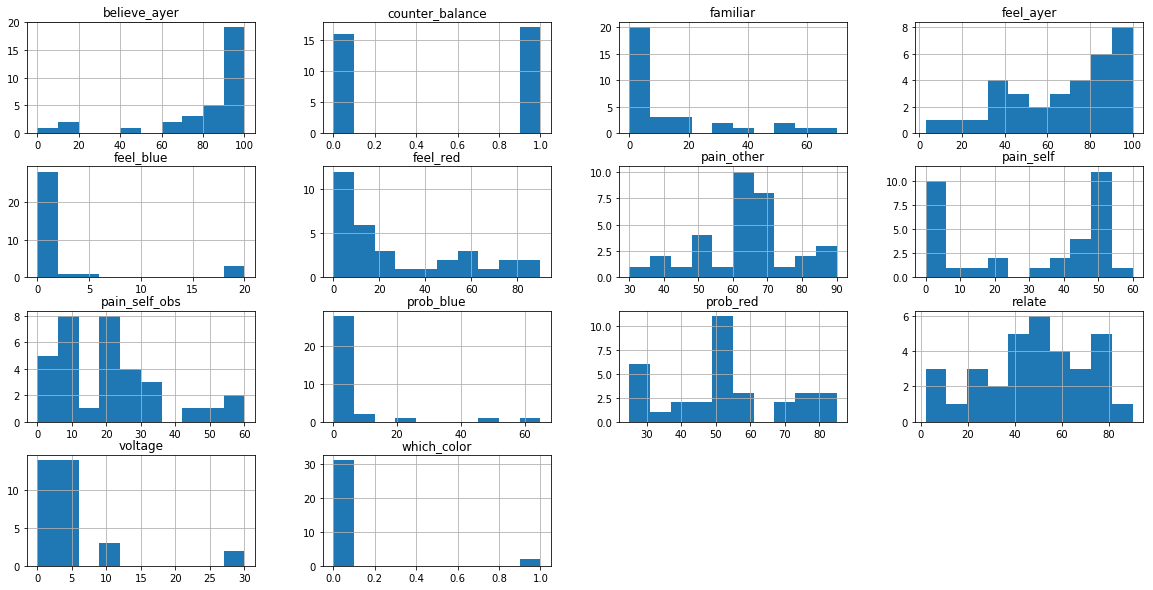

In [33]:
b_data.hist(figsize=[20,10]); 

In [34]:
in_session_data = b_data

In [35]:
b_data

,believe_ayer,color,counter_balance,familiar,feel_ayer,feel_blue,feel_red,pain_other,pain_self,pain_self_obs,prob_blue,prob_red,relate,subject_id,voltage,which_color
0,100.0,red,1,60.0,100.0,0.0,70.0,58.0,10.0,6.0,0.0,50.0,80.0,19,10.00,0.0
1,80.0,red,0,0.0,80.0,20.0,90.0,50.0,3.0,20.0,0.0,70.0,20.0,20,3.00,0.0
2,100.0,red,1,0.0,75.0,0.0,60.0,60.0,50.0,25.0,0.0,75.0,80.0,21,3.50,0.0
3,80.0,red,0,0.0,70.0,0.0,20.0,60.0,50.0,25.0,0.0,50.0,50.0,22,2.00,0.0
4,90.0,red,1,30.0,90.0,0.0,40.0,45.0,40.0,10.0,0.0,60.0,70.0,23,10.00,0.0
5,15.0,red,0,0.0,3.0,0.0,10.0,50.0,45.0,0.0,0.0,50.0,2.0,24,4.00,0.0
6,40.0,red,1,0.0,70.0,20.0,50.0,70.0,50.0,20.0,10.0,80.0,5.0,25,2.40,0.0
7,100.0,red,0,0.0,100.0,0.0,5.0,40.0,3.0,10.0,10.0,75.0,50.0,26,0.00,0.0
8,60.0,red,1,30.0,40.0,0.0,80.0,65.0,50.0,10.0,0.0,30.0,50.0,27,4.50,0.0
9,60.0,red,0,40.0,60.0,3.0,6.0,90.0,60.0,60.0,0.0,80.0,60.0,28,2.50,0.0


In [36]:
corr_matrix = b_data[[0,1,3,4,5,6,7,8,9,10,11,12,14]].corr()
corr_names = corr_matrix.columns

In [37]:
% pylab inline 

Populating the interactive namespace from numpy and matplotlib


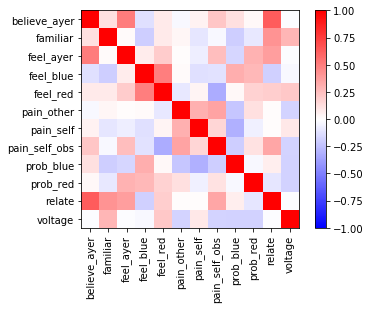

In [38]:
xs = np.arange(0,len(corr_names),1)
ys = np.arange(0,len(corr_names),1)

imshow(corr_matrix, cmap='bwr', vmin=-1, vmax=1)

xticks(xs, corr_names[xs], rotation=90)
yticks(ys, corr_names[ys]); colorbar(); 

In [39]:
# add eyelink (percent) data
# add scr data (renewal, US)
b_data

,believe_ayer,color,counter_balance,familiar,feel_ayer,feel_blue,feel_red,pain_other,pain_self,pain_self_obs,prob_blue,prob_red,relate,subject_id,voltage,which_color
0,100.0,red,1,60.0,100.0,0.0,70.0,58.0,10.0,6.0,0.0,50.0,80.0,19,10.00,0.0
1,80.0,red,0,0.0,80.0,20.0,90.0,50.0,3.0,20.0,0.0,70.0,20.0,20,3.00,0.0
2,100.0,red,1,0.0,75.0,0.0,60.0,60.0,50.0,25.0,0.0,75.0,80.0,21,3.50,0.0
3,80.0,red,0,0.0,70.0,0.0,20.0,60.0,50.0,25.0,0.0,50.0,50.0,22,2.00,0.0
4,90.0,red,1,30.0,90.0,0.0,40.0,45.0,40.0,10.0,0.0,60.0,70.0,23,10.00,0.0
5,15.0,red,0,0.0,3.0,0.0,10.0,50.0,45.0,0.0,0.0,50.0,2.0,24,4.00,0.0
6,40.0,red,1,0.0,70.0,20.0,50.0,70.0,50.0,20.0,10.0,80.0,5.0,25,2.40,0.0
7,100.0,red,0,0.0,100.0,0.0,5.0,40.0,3.0,10.0,10.0,75.0,50.0,26,0.00,0.0
8,60.0,red,1,30.0,40.0,0.0,80.0,65.0,50.0,10.0,0.0,30.0,50.0,27,4.50,0.0
9,60.0,red,0,40.0,60.0,3.0,6.0,90.0,60.0,60.0,0.0,80.0,60.0,28,2.50,0.0


In [40]:
import pandas

In [44]:
# load subject data from csv file--downloaded from qualtrics 
# old data 
#path2questionnaires = '/Users/biota/Desktop/sSL/general/data_analyses/data/selfReportData/IRI_allSubjects.csv'
path2questionnaires = '/Users/biota/Desktop/IRI_test.csv'
subjectInfo = pandas.read_csv(path2questionnaires,sep='comma')

subject_names = b_data["subject_id"].values

# prep data structures
IRI = []
subjectNamesIRI = []

# extract each subject's responses
for i_subject in subject_names: 
    for iSubject in range(2,len(subjectInfo)): 
        this = subjectInfo.values[iSubject][0]
        if i_subject in this: 
            start_ind = str.find(this, i_subject) + 4
            answer = this[start_ind::2]
            who =  i_subject 
            print answer
            IRI.append([answer,who])
            subjectNamesIRI.append(who)

inventoryNames = ['perspective_taking', # PT 
                  'fantasy',            # FS
                  'empathic_concern',   # EC
                  'personal_distress']  # PD

# recreate question order 
questions = ['FS', # 1. I daydream and fantasize, with some regularity, about things that might happen to me.
             'EC', # 2. I often have tender, concerned feelings for people less fortunate than me. 
             'PT-',# 3. I sometimes find it difficult to see things from the "other guy's" point of view. (PT) (-) 
             'EC', # 4. Sometimes I don't feel very sorry for other people when they are having problems. (EC) (-)
             'FS', # 5. I really get involved with the feelings of the characters in a novel. (FS)
             'PD', # 6. In emergency situations, I feel apprehensive and ill-at-ease. (PD)
             'FS-',# 7. I am usually objective when I watch a movie or play, and I don't often get completely caught up in it. (FS) (-)
             'PT', # 8. I try to look at everybody's side of a disagreement before I make a decision. (PT)
             'EC', # 9. When I see someone being taken advantage of, I feel kind of protective towards them. (EC)
             'PD', # 10. I sometimes feel helpless when I am in the middle of a very emotional situation. (PD)
             'PT', # 11. I sometimes try to understand my friends better by imagining how things look from their perspective. (PT)
             'FS-',# 12. Becoming extremely involved in a good book or movie is somewhat rare for me. (FS) (-) 
             'PD-',# 13. When I see someone get hurt, I tend to remain calm. (PD) (-)
             'EC-',# 14. Other people's misfortunes do not usually disturb me a great deal. (EC) (-)
             'PT-',# 15. If I'm sure I'm right about something, I don't waste much time listening to other people's arguments. (PT) (-)
             'FS', # 16. After seeing a play or movie, I have felt as though I were one of the characters. (FS)
             'PD', # 17. Being in a tense emotional situation scares me. (PD)
             'EC-',# 18. When I see someone being treated unfairly, I sometimes don't feel very much pity for them. (EC) (-)
             'PD-',# 19. I am usually pretty effective in dealing with emergencies. (PD) (-)
             'EC', # 20. I am often quite touched by things that I see happen. (EC)
             'PT', # 21. I believe that there are two sides to every question and try to look at them both. (PT)
             'EC', # 22. I would describe myself as a pretty soft-hearted person. (EC)
             'FS', # 23. When I watch a good movie, I can very easily put myself in the place of a leading character. (FS)
             'PD', # 24. I tend to lose control during emergencies. (PD)
             'PT', # 25. When I'm upset at someone, I usually try to "put myself in his shoes" for a while. (PT) 
             'FS', # 26. When I am reading an interesting story or novel, I imagine how I would feel if the events in the story were happening to me. (FS)
             'PD', # 27. When I see someone who badly needs help in an emergency, I go to pieces. (PD)
             'PT'] # 28. Before criticizing somebody, I try to imagine how I would feel if I were in their place. (PT)

# prep data structures
PT  = [] 
FS  = [] 
EC  = [] 
PD  = []
REV = []

# find indices for each subscale
for iQ in range(0,len(questions)): 
    if   questions[iQ][0:2] == 'PT': 
        PT.append(iQ)
    elif questions[iQ][0:2] == 'FS':
        FS.append(iQ)
    elif questions[iQ][0:2] == 'EC':
        EC.append(iQ)
    elif questions[iQ][0:2] == 'PD':
        PD.append(iQ)
    # items to be reverse scored 
    if questions[iQ][-1] == '-': 
        REV.append(iQ)

1aoyosE,yy2300002332441110202241212003
1aoyosE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1aoyosE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1aoyosE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1aoyosE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1aoyosE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1aoyosE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1aoyosE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1aoyosE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
506.51961033,,221 90,_jzC4akk,,,74709-2.797,nnmu,N93422422333202142413323322311
1aoyosE,04311231343323113402334424313
1aoyosE,14213232443311112302242222313
1aoyosE,23412431444312033213344403203
1aoyosE,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1aoyosE,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1aoyosE,54312332344321123323333323412
1aoyosE,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1aoyosE,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,
60116.0.,0,6811/61 90,_l6zuwDZ,,,74709-2.797,nnmu,N1,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1aoyosE,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1aoyosE,2,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1131 00,,7.62851032,,//82:2RAxn0CBeF,,3.180,121191aoyosE,2,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1aoyosE,2,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [45]:
# prep data structures
inventory = [PT, FS, EC, PD]
IRIscores = pandas.DataFrame({'subject_names':[int(subjectNamesIRI[ii][1:]) for ii in range(len(subjectNamesIRI))]})

for iSubscale in range(0,len(inventory)): 
    print(testChoice)
    testvec = []
    testScale = inventory[iSubscale]
    for iSubject in range(0,len(subjectNamesIRI)): 
        tmpvals = np.zeros(len(testScale))
        testChoice = IRI[iSubject][0]
        for iInd in range(0,len(testScale)): 
            ind = int(testScale[iInd])
            # reverse scaled items: 0 -> 4, 4 -> 0, 3 -> 1, ... 2 -> 2 
            tmpVal = abs((ind in REV) * 4 - int(testChoice[ind]))
            tmpvals[iInd] = int(tmpVal)
        testvec.append(sum(tmpvals))
    IRIscores[inventoryNames[iSubscale]] = testvec

1aoyosE,yy2300002332441110202241212003


ValueError: invalid literal for int() with base 10: 'o'

161

In [203]:
# join data frames
behavioral = b_data.join(IRIscores) 
# clean up for visualization 
clean_up = ['counter_balance', 'subject names', 'subject_id', 'which_color']
behavioral = behavioral.drop(clean_up, axis=1)

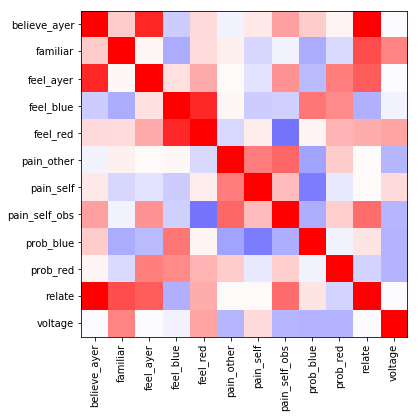

In [204]:
figure(figsize=[6,6])
b_corr = behavioral.corr()
imshow(b_corr, cmap='bwr', vmin=-.6, vmax=.6)
yticks(range(len(b_corr.columns)), b_corr.columns); 
xticks(range(len(b_corr.columns)), b_corr.columns, rotation=90); 

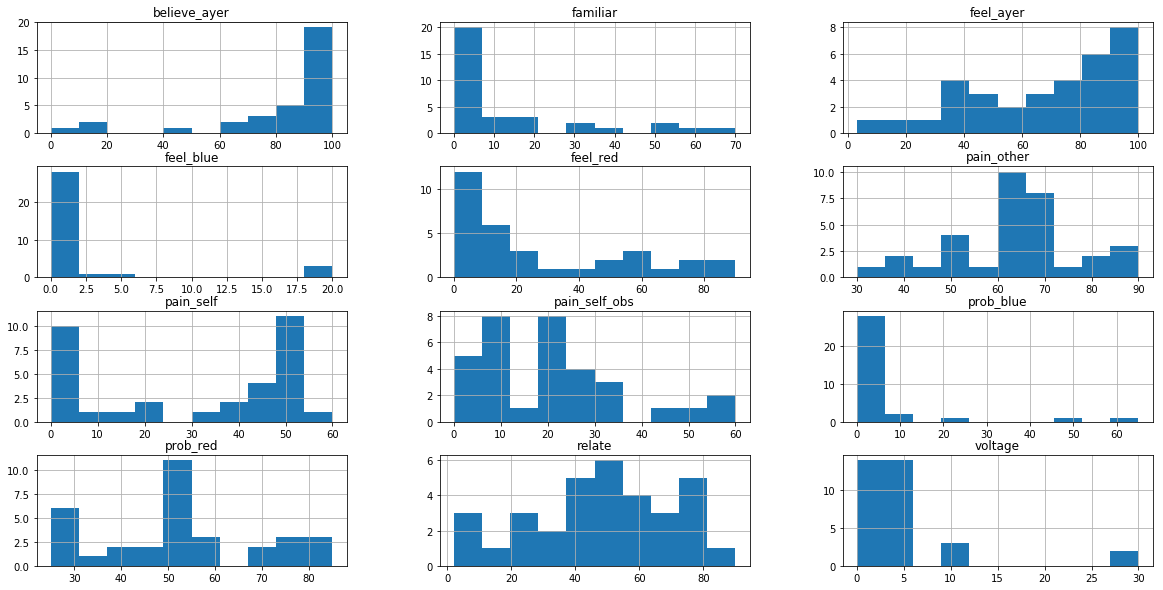

In [205]:
behavioral.hist(figsize=[20,10]); 

In [206]:
trait_data = IRIscores

In [140]:
import pickle

# Saving the objects:

with open('behavioral_analysis_objects.pkl', 'w') as f:  # Python 3: open(..., 'wb')
    pickle.dump([behavioral, in_session_data, trait_data], f)

In [88]:
import pickle

with open('gaze_analysis_objects.pkl') as f:  # Python 3: open(..., 'rb')
    main, gaze_data, gaze_subjects = pickle.load(f)

In [ ]:





# end of file's function. 





In [139]:
# behavioral['gaze_face'] = face_data
# behavioral['gaze_hand'] = hand_data
# behavioral['gaze_square'] = square_data
tmp_data = behavioral[1:len(face_data)+1]
tmp_data['gaze_face'] = face_data
tmp_data['gaze_hand'] = hand_data
tmp_data['gaze_stim'] = square_data

NameError: name 'face_data' is not defined

In [ ]:
figure(figsize=[6,6])
tmp_corr = tmp_data.corr()
imshow(tmp_corr, cmap='bwr', vmin=-1, vmax=1)
yticks(range(len(tmp_corr.columns)), tmp_corr.columns); 
xticks(range(len(tmp_corr.columns)), tmp_corr.columns, rotation=90); 

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [ ]:
x_axis = 'gaze_face'
y_axis = 'pain_self_obs'
formula = '%s ~ %s'%(x_axis, y_axis)
model = ols(formula, tmp_data).fit()
aov_table = anova_lm(model, typ=2)
print '\n\n\t\t', formula, '\n\n', aov_table

scatter(tmp_data[x_axis], tmp_data[y_axis], color='xkcd:purple', alpha=.5)
xlabel(x_axis) ; ylabel(y_axis); 
title('not significant but possibly just because of low n\n');

In [ ]:
x_axis = 'fantasy'
y_axis = 'pain_self_obs'
formula = '%s ~ %s'%(x_axis, y_axis)
model = ols(formula, tmp_data).fit()
aov_table = anova_lm(model, typ=2)
print '\n\n\t\t', formula, '\n\n', aov_table

scatter(tmp_data['empathic_concern'], tmp_data['pain_self_obs'], color='xkcd:purple', alpha=.5,label='pain_self_obs')
scatter(tmp_data['fantasy'], tmp_data['pain_self_obs'], color='blue', alpha=.5,label='fantasy')
ylabel('pain_self_obs')
title('\nself reported pain of observing the model being shocked\n')
legend(); 